In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Load dataset

In [2]:
# Matminer (Materials Data Mining) is a Python library for data mining the properties of materials.
# It has 40+ ready-made datasets (matminer.datasets)
from matminer.datasets import load_dataset

In [11]:
# Ref: Jong, M. De, et al., “Charting the complete elastic properties of inorganic crystalline compounds”, 
# Scientific Data volume 2, Article number: 150009 (2015)

# Load a dataset of computed elastic properties of materials which is sourced from the paper above.
# It has 1,181 structures with elastic properties calculated with DFT-PBE.
df = load_dataset("elastic_tensor_2015")

Below is a list of the properties included in this dataset

| Column | Description |
|------|-----|
| G_Reuss | Lower bound on shear modulus for polycrystalline material|
| G_VRH | Average of G_Reuss and G_Voigt|
| G_Voigt | Upper bound on shear modulus for polycrystalline material|
| K_Reuss | Lower bound on bulk modulus for polycrystalline material|
| K_VRH | Average of K_Reuss and K_Voigt|
| K_Voigt | Upper bound on bulk modulus for polycrystalline material|
| cif | optional: Description string for structure|
| compliance_tensor | Tensor describing elastic behavior|
| elastic_anisotropy | measure of directional dependence of the materials elasticity, metric is always >= 0|
| elastic_tensor | Tensor describing elastic behavior corresponding to IEEE orientation, symmetrized to crystal structure|
| elastic_tensor_original | Tensor describing elastic behavior, unsymmetrized, corresponding to POSCAR conventional standard cell orientation |
| formula | Chemical formula of the material |
| kpoint_density | optional: Sampling parameter from calculation |
| material_id | Materials Project ID of the material|
| nsites | The # of atoms in the unit cell of the calculation|
| poisson_ratio | Describes lateral response to loading|
| poscar | optional: Poscar metadata|
| space_group | Integer specifying the crystallographic structure of the material|
| structure | pandas Series defining the structure of the material|
| volume | Volume of the unit cell in cubic angstroms, For supercell calculations, this quantity refers to the volume of the full supercell|s, For supercell calculations, this quantity refers to the volume of the full supercell.

In [12]:
# Take a look at the data set
df.head()

,material_id,formula,nsites,space_group,volume,structure,elastic_anisotropy,G_Reuss,G_VRH,G_Voigt,K_Reuss,K_VRH,K_Voigt,poisson_ratio,compliance_tensor,elastic_tensor,elastic_tensor_original,cif,kpoint_density,poscar
0,mp-10003,Nb4CoSi,12,124,194.419802,"[[0.94814328 2.07280467 2.5112 ] Nb, [5.273...",0.030688,96.844535,97.141604,97.438674,194.267623,194.268884,194.270146,0.285701,"[[0.004385293093993, -0.0016070693558990002, -...","[[311.33514638650246, 144.45092552856926, 126....","[[311.33514638650246, 144.45092552856926, 126....",#\#CIF1.1\n###################################...,7000,Nb8 Co2 Si2\n1.0\n6.221780 0.000000 0.000000\n...
1,mp-10010,Al(CoSi)2,5,164,61.987320,"[[0. 0. 0.] Al, [1.96639263 1.13529553 0.75278...",0.266910,93.939650,96.252006,98.564362,173.647763,175.449907,177.252050,0.268105,"[[0.0037715428949660003, -0.000844229828709, -...","[[306.93357350984974, 88.02634955100905, 105.6...","[[306.93357350984974, 88.02634955100905, 105.6...",#\#CIF1.1\n###################################...,7000,Al1 Co2 Si2\n1.0\n3.932782 0.000000 0.000000\n...
2,mp-10015,SiOs,2,221,25.952539,"[[1.480346 1.480346 1.480346] Si, [0. 0. 0.] Os]",0.756489,120.962289,130.112955,139.263621,295.077545,295.077545,295.077545,0.307780,"[[0.0019959391925840004, -0.000433146670736000...","[[569.5291276937579, 157.8517489654999, 157.85...","[[569.5291276937579, 157.8517489654999, 157.85...",#\#CIF1.1\n###################################...,7000,Si1 Os1\n1.0\n2.960692 0.000000 0.000000\n0.00...
3,mp-10021,Ga,4,63,76.721433,"[[0. 1.09045794 0.84078375] Ga, [0. ...",2.376805,12.205989,15.101901,17.997812,49.025963,49.130670,49.235377,0.360593,"[[0.021647143908635, -0.005207263618160001, -0...","[[69.28798774976904, 34.7875015216915, 37.3877...","[[70.13259066665267, 40.60474945058445, 37.387...",#\#CIF1.1\n###################################...,7000,Ga4\n1.0\n2.803229 0.000000 0.000000\n0.000000...
4,mp-10025,SiRu2,12,62,160.300999,"[[1.0094265 4.24771709 2.9955487 ] Si, [3.028...",0.196930,100.110773,101.947798,103.784823,255.055257,256.768081,258.480904,0.324682,"[[0.00410214297725, -0.001272204332729, -0.001...","[[349.3767766177825, 186.67131003104407, 176.4...","[[407.4791016459293, 176.4759188081947, 213.83...",#\#CIF1.1\n###################################...,7000,Si4 Ru8\n1.0\n4.037706 0.000000 0.000000\n0.00...


In [15]:
# check columns
df.columns

Index(['material_id', 'formula', 'nsites', 'space_group', 'volume',
       'structure', 'elastic_anisotropy', 'G_Reuss', 'G_VRH', 'G_Voigt',
       'K_Reuss', 'K_VRH', 'K_Voigt', 'poisson_ratio', 'compliance_tensor',
       'elastic_tensor', 'elastic_tensor_original', 'cif', 'kpoint_density',
       'poscar'],
      dtype='object')

In [28]:
# getting a feel for the data using descriptive statistics
df.describe()

,nsites,space_group,volume,elastic_anisotropy,G_Reuss,G_VRH,G_Voigt,K_Reuss,K_VRH,K_Voigt,poisson_ratio,kpoint_density,G_K_ratio,LHS,RHS
count,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000
mean,12.425910,163.403895,207.177098,2.145013,64.050568,67.543145,71.035720,135.171392,136.259661,137.347932,0.287401,7536.833192,0.503750,0.335833,0.335832
std,11.817997,65.040733,192.355747,19.140097,44.696380,44.579408,45.388731,73.582579,72.886978,72.922887,0.062177,3446.890979,0.173221,0.115480,0.115480
min,2.000000,4.000000,15.850527,0.000005,1.870270,2.722175,3.574080,4.714976,6.476135,6.476138,0.042582,1000.000000,0.066392,0.044261,0.044261
25%,5.000000,124.000000,83.944059,0.145030,30.244413,34.117959,37.270657,74.960699,76.435350,76.520333,0.249159,7000.000000,0.386495,0.257663,0.257663
50%,10.000000,193.000000,168.920404,0.355287,56.263878,59.735163,62.635382,129.984790,130.382766,131.849056,0.290198,7000.000000,0.487838,0.325225,0.325225
75%,16.000000,221.000000,261.420345,0.923117,86.979486,91.332142,95.785011,189.195104,189.574194,190.912352,0.328808,7000.000000,0.602423,0.401615,0.401615
max,152.000000,229.000000,2398.906164,397.297866,520.845926,522.921225,524.996524,435.658754,435.661487,435.664220,0.467523,45000.000000,1.316207,0.877471,0.877471


## Basic data analysis

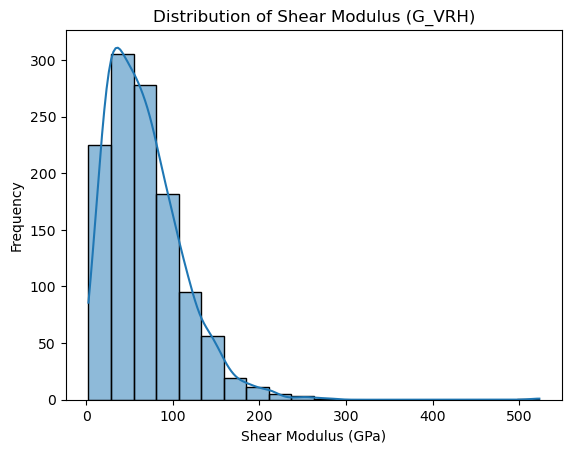

In [13]:
# For example, check shear modulus
sns.histplot(df['G_VRH'], bins=20, kde=True)
plt.title('Distribution of Shear Modulus (G_VRH)')
plt.xlabel('Shear Modulus (GPa)')
plt.ylabel('Frequency')
plt.show()

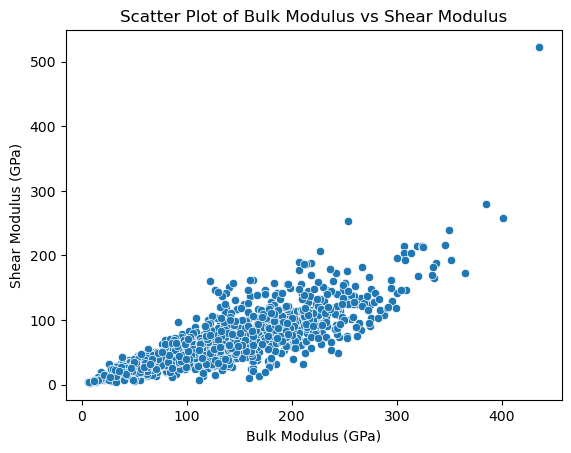

In [17]:
# Another example: check the relationship between bulk modulus and shear modulus

# make scatter plot
sns.scatterplot(x='K_VRH', y='G_VRH', data=df)
plt.title('Scatter Plot of Bulk Modulus vs Shear Modulus')
plt.xlabel('Bulk Modulus (GPa)')
plt.ylabel('Shear Modulus (GPa)')
plt.show()

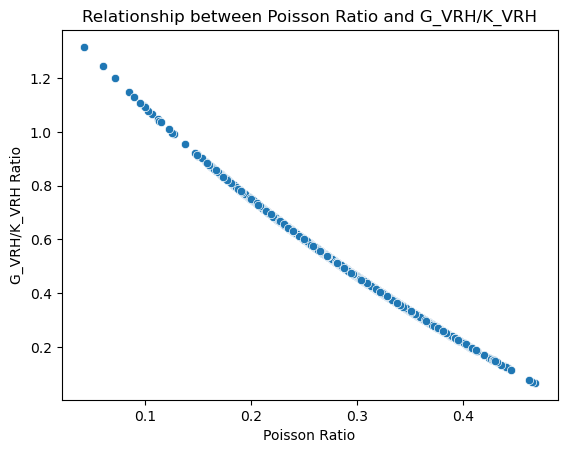

In [18]:
# Another example, check the relationship between Poisson ratio and the ratio between shear modulus ond bulk modulus

# create a new column for the ratio between shear modulus ond bulk modulus
df['G_K_ratio'] = df['G_VRH'] / df['K_VRH']

# make scatter plot
sns.scatterplot(x='poisson_ratio', y='G_K_ratio', data=df)
plt.title('Relationship between Poisson Ratio and G_VRH/K_VRH')
plt.xlabel('Poisson Ratio')
plt.ylabel('G_VRH/K_VRH Ratio')
plt.show()

This looks interesting. For an elastic material, if Hooke's law applies, the strain experienced by the corresponding stress is proportional to that stress, and there is a relationship between among shear modulus $G$, bulk modulus $K$, and the Poisson ratio, $u$.

$$ 2G(1+u) = 3K(1-2u) $$

Rewrite it in the following way

$$ \frac{2G}{3K} = \frac{1-2u}{1+u} $$

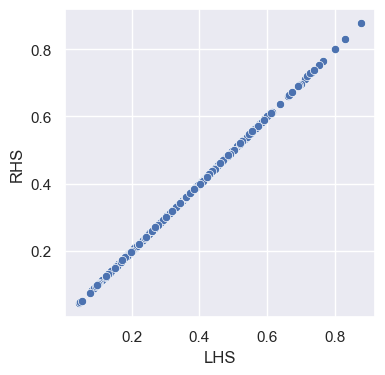

In [21]:
# let's test this:
# create a new column for the ratio between shear modulus ond bulk modulus
df['LHS'] = 2.0*df['G_VRH'] / df['K_VRH'] / 3.0
df['RHS'] = (1.0-2.0*df['poisson_ratio'])/(1.0+df['poisson_ratio'])

# make scatter plot
sns.scatterplot(x='LHS', y='RHS', data=df)
sns.set(rc={"figure.figsize": (4, 4)})
plt.xlabel('LHS')
plt.ylabel('RHS')
plt.show()

## Data cleaning

In [40]:
# removing unneeded columns from the dataset
# check columns first
df.columns

Index(['material_id', 'formula', 'nsites', 'space_group', 'volume',
       'structure', 'elastic_anisotropy', 'G_Reuss', 'G_VRH', 'G_Voigt',
       'K_Reuss', 'K_VRH', 'K_Voigt', 'poisson_ratio', 'compliance_tensor',
       'elastic_tensor', 'elastic_tensor_original', 'cif', 'kpoint_density',
       'poscar', 'G_K_ratio', 'LHS', 'RHS'],
      dtype='object')

In [41]:
unwanted_columns = ['kpoint_density','material_id','formula','structure','compliance_tensor','elastic_tensor_original','cif','poscar','elastic_tensor', 'LHS', 'RHS']
df_updated = df.drop(unwanted_columns, axis=1)
df_updated.head()

,nsites,space_group,volume,elastic_anisotropy,G_Reuss,G_VRH,G_Voigt,K_Reuss,K_VRH,K_Voigt,poisson_ratio,G_K_ratio
0,12,124,194.419802,0.030688,96.844535,97.141604,97.438674,194.267623,194.268884,194.270146,0.285701,0.500037
1,5,164,61.987320,0.266910,93.939650,96.252006,98.564362,173.647763,175.449907,177.252050,0.268105,0.548601
2,2,221,25.952539,0.756489,120.962289,130.112955,139.263621,295.077545,295.077545,295.077545,0.307780,0.440945
3,4,63,76.721433,2.376805,12.205989,15.101901,17.997812,49.025963,49.130670,49.235377,0.360593,0.307382
4,12,62,160.300999,0.196930,100.110773,101.947798,103.784823,255.055257,256.768081,258.480904,0.324682,0.397042


## First exploration: linear regression

In [50]:
# use train_test_split to split datset
from sklearn.model_selection import train_test_split
# use linear regression
from sklearn.linear_model import LinearRegression
# use mean_squared_error and r2_score(R-squared) to evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

# 1. data preparation
# Assume that our target property is poisson ratio
X = df_updated.drop(columns=['G_K_ratio','poisson_ratio'])
y = df_updated['poisson_ratio']

# 2. data preprocessing (let's skip this step for now)

# 3. data split, use 20% data as testset, 80% as training set
# random_state here specifies the random number seed, this is useful for debugging codes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. define a model. Here we use linear regression
model = LinearRegression()

# 5. train the model
model.fit(X_train, y_train)

# 6. assess the model performance
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.000868522570415897
R-squared: 0.7851901947512305


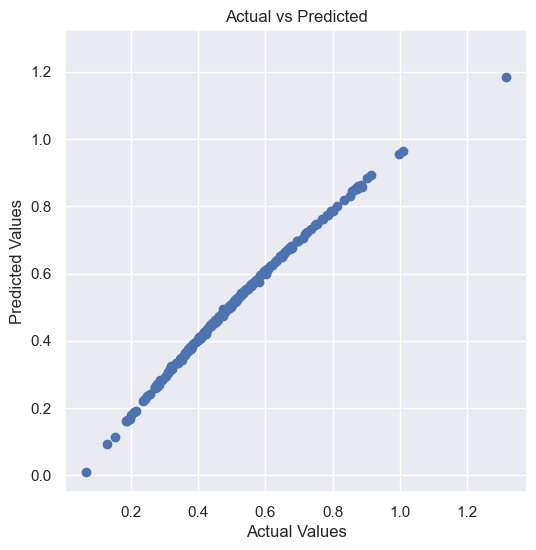

In [43]:
# make the parity plot
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred)
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.axis('square')
plt.show()

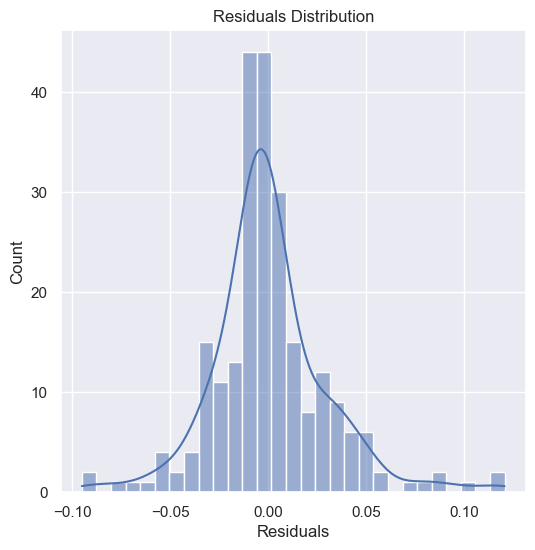

In [51]:
# check the residual distribution
# Residual = Actual value – Predicted value
residuals = y_test - y_pred
plt.figure(figsize=(6, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.show()

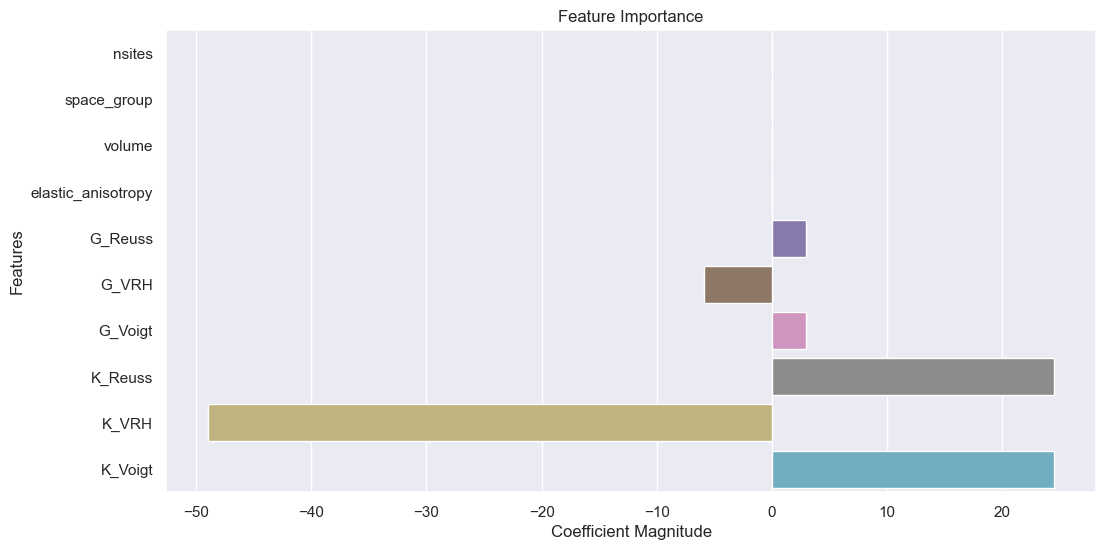

In [52]:
# Visualize the importance of features
# positive value: positive correlation
# negative value: negative correlation
# absolute value: the importance of the feature
if hasattr(model, 'coef_'):
    feature_importance = model.coef_
    plt.figure(figsize=(12, 6))
    sns.barplot(x=feature_importance, y=X.columns)
    plt.title('Feature Importance')
    plt.xlabel('Coefficient Magnitude')
    plt.ylabel('Features')
    plt.show()

What we've done is not very useful, because we already know poisson ratio is related to shear modulus and bulk modulus.